In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
import seaborn as sns
import pandas as pd

In [2]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)

In [3]:
dframe = pd.read_csv('dframe_jobs_processed.csv', sep='|', encoding='UTF-16')

In [4]:
dframe.head()

,company_name,job_area,job_link,job_extraction_timestamp,job_title,job_location,job_main_responsabilities,job_other_details,job_main_responsabilities_lang,job_other_details_lang,job_main_responsabilities_pt,job_other_details_pt,job_main_responsabilities_pt_processed,job_other_details_pt_processed,job_title_type,Macro_job_area
0,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:38:13.363,Finance and Planning Manager,Brazil,-Detailed analysis of P&L variances versus for...,"- Strong expertise managing budget, forecast, ...",en,en,-Análise detalhada das variações de P&L versus...,- Forte experiência em gerenciamento de orçame...,análise detalhada das variações de p&l versus ...,forte experiência em gerenciamento de orçament...,management_manager,Finance & Legal
1,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:42:08.465,Finance Business Partner,Colombia,Evaluate the end to end financial process for ...,"University graduate in the domain of Finance, ...",en,en,Avalie o processo financeiro de ponta a ponta ...,Graduação universitária no domínio de Finanças...,avalie o processo financeiro de ponta a ponta ...,graduação universitária no domínio de finanças...,business_partner,Finance & Legal
2,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:44:29.556,Finance Manager,Mexico,"1. Financial Budget, Forecast, Closing, ...",The successful applicant:\nUniversity graduate...,en,en,"1. Orçamento Financeiro, Previsão, Fechamento,...",O candidato bem-sucedido: Graduado universitár...,1 orçamento financeiro previsão fechamento con...,o candidato bemsucedido: graduado universitári...,management_manager,Finance & Legal
3,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:46:47.127,Finance Manager FP&A,Mexico,"1. Financial Budget, Forecast, Closing, ...","University graduate in Finance, Commerce or En...",en,en,"1. Orçamento Financeiro, Forecast, Fechamento,...","Graduação universitária em Finanças, Comércio ...",1 orçamento financeiro forecast fechamento con...,graduação universitária em finanças comércio o...,management_manager,Finance & Legal
4,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:49:03.129,Finance Senior Manager,Mexico,"1. Financial Budget, Forecast, Closing, ...","University graduate in the domain of Finance, ...",en,en,"1. Orçamento Financeiro, Previsão, Fechamento,...","Graduado universitário no domínio de Finanças,...",1 orçamento financeiro previsão fechamento con...,graduado universitário no domínio de finanças ...,management_manager,Finance & Legal


Let's start plotting!

In [59]:
dframe_location_and_language = dframe.groupby(['job_location'],as_index=False)['job_extraction_timestamp'].count()
dframe_location_and_language.columns = ['Location','Qty']
dframe_location_and_language = dframe_location_and_language.sort_values('Qty',ascending=True)

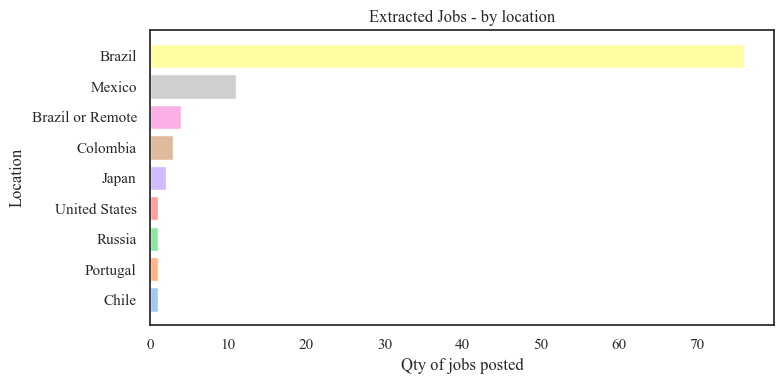

In [66]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.barh(dframe_location_and_language['Location'], dframe_location_and_language['Qty'], color=colors)
plt.xlabel('Qty of jobs posted')
plt.ylabel('Location')
plt.title('Extracted Jobs - by location')
plt.show()

In [57]:
dframe_job_title_type = dframe.groupby(['job_title_type'],as_index=False)['job_extraction_timestamp'].count()
dframe_job_title_type.columns = ['Job Title Type','Qty']
dframe_job_title_type = dframe_job_title_type.sort_values('Qty',ascending=True).reset_index()

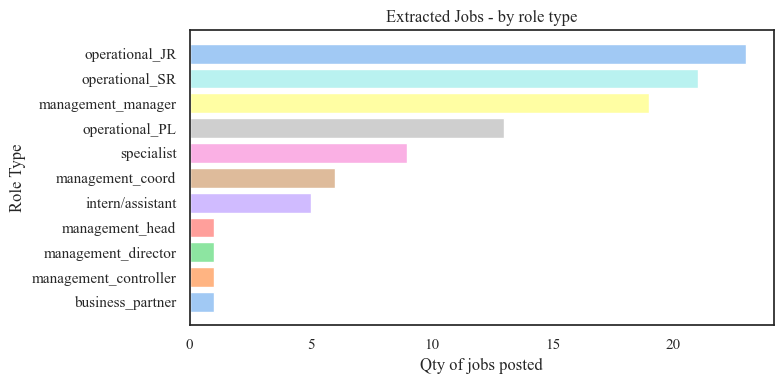

In [58]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette("pastel")
plt.barh(dframe_job_title_type['Job Title Type'], dframe_job_title_type['Qty'], color=colors)
plt.xlabel('Qty of jobs posted')
plt.ylabel('Role Type')
plt.title('Extracted Jobs - by role type')
plt.show()

In [61]:
dframe_job_lang = dframe.groupby(['job_main_responsabilities_lang'],as_index=False)['job_extraction_timestamp'].count()
dframe_job_lang.columns = ['Language of the job posted','Qty']
dframe_job_lang = dframe_job_lang.sort_values('Qty',ascending=False).reset_index()

In [64]:
dframe_job_lang

,index,Language of the job posted,Qty
0,2,pt,58
1,0,en,41
2,1,es,1


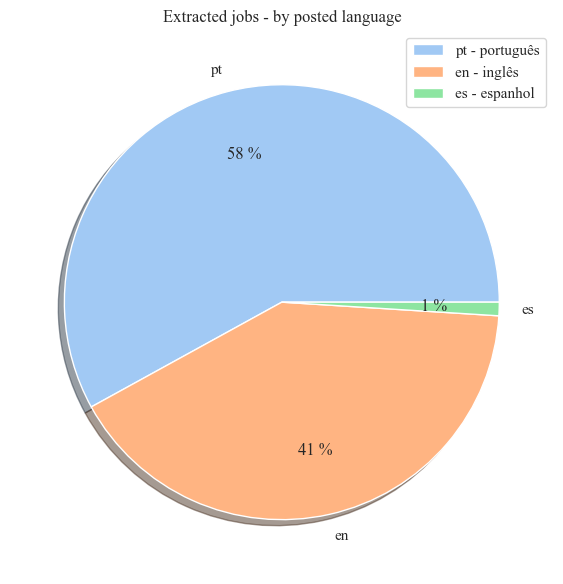

In [65]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
plt.pie(dframe_job_lang['Qty'], labels=dframe_job_lang['Language of the job posted'], pctdistance=.7, autopct='%.0f %%',
          colors=colors, shadow=True)
plt.title('Extracted jobs - by posted language')
plt.legend(['pt - português','en - inglês', 'es - espanhol'])
plt.show()